# **CNN을 이용한 자연어 처리**

---
- 참고도서
  - 파이토치로 배우는 자연어처리(델립라오, 브라이언 맥머핸 지음 / 박해선 옮김 | 한빛미디어)
  - 텐서플로 2와 머신러닝으로 시작하는 자연어 처리 (전창욱, 최태균, 조종현, 신성진 지음 | 위키북스)
---

## **1. PyTorch로 CNN 구현하기**

### 1.1 데이터 만들기
- 특성 벡터를 만들기 위하여 실제 데이터와 크기가 같은 3차원의 인공 데이터 텐서 생성
- 파이토치의 Conv1d 클래스의 객체를 생성한 3차원 데이터 텐서에 적용함

In [ ]:
batch_size = 2
one_hot_size = 10
sequence_width = 7

data = torch.randn(batch_size, one_hot_size, sequence_width)
conv1 = nn.Conv1d(in_channels=one_hot_size, out_channels=16, kernel_size=3)
intermediate1 = conv1(data)

print(data.size())
print(intermediate1.size())

torch.Size([2, 10, 7])
torch.Size([2, 16, 5])


- 데이터에 합성곱 반복 적용
  - 합성곱을 추가하여 출력 텐서의 크기를 줄이는 작업을 반복 적용
  - 코드에서는 3번의 합성곱 후에 출력의 마지막 차원이 size=1이 되도록 구성

In [ ]:
conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3)
conv3 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3)

intermediate2 = conv2(intermediate1)
intermediate3 = conv3(intermediate2)

print(intermediate2.size())
print(intermediate3.size())

torch.Size([2, 32, 3])
torch.Size([2, 64, 1])


In [ ]:
y_output = intermediate3.squeeze()
print(y_output.size())

torch.Size([2, 64])


In [ ]:
intermediate2.mean(dim=0).mean(dim=1).sum()

tensor(0.2066, grad_fn=<SumBackward0>)

- 특성 벡터를 줄이기 위한 다른 방법 2가지

In [ ]:
# 특성 벡터를 줄이는 방법 2
print(intermediate1.view(batch_size, -1).size())

# 특성 벡터를 줄이는 방법 2
print(torch.mean(intermediate1, dim=2).size())
# print(torch.max(intermediate1, dim=2).size())
# print(torch.sum(intermediate1, dim=2).size())

torch.Size([2, 80])
torch.Size([2, 16])


- 배치 정규화와 Conv1D 층 사용하기
  - 전체 모델을 다시 만들지 않고 배치 정규화를 사용하는 방법

In [ ]:
conv1 = nn.Conv1d(in_channels=one_hot_size, out_channels=16, kernel_size=3)
conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3)
conv3 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3)

conv1_bn = nn.BatchNorm1d(num_features=16)
conv2_bn = nn.BatchNorm1d(num_features=32)
    
intermediate1 = conv1_bn(F.relu(conv1(data)))
intermediate2 = conv2_bn(F.relu(conv2(intermediate1)))
intermediate3 = conv3(intermediate2)

print(intermediate1.size())
print(intermediate2.size())
print(intermediate3.size())

torch.Size([2, 16, 5])
torch.Size([2, 32, 3])
torch.Size([2, 64, 1])


In [ ]:
# 노트: 
# 배치 정규화는 배치와 시퀀스 차원에 대해 통곗값을 계산합니다. 
# 다른 말로하면 BatchNorm1d에 입력되는 텐서의 크기는 (B, C, L)입니다(B는 배치, C는 채널, L은 길이).
# 각 (B, L) 슬라이스마다 원점에 평균을 맞춥니다. 
# 이는 공변량 변화(covariate shift)를 줄입니다.

intermediate2.mean(dim=(0, 2))

tensor([ 0.0000e+00,  5.9605e-08,  0.0000e+00, -3.9736e-08,  1.9868e-08,
         3.9736e-08,  3.9736e-08,  0.0000e+00,  6.9539e-08,  1.9868e-08,
        -4.9671e-08, -1.9868e-08,  0.0000e+00,  1.9868e-08, -5.9605e-08,
         1.9868e-08,  7.9473e-08, -3.9736e-08,  9.9341e-09, -3.9736e-08,
         0.0000e+00,  3.9736e-08,  1.9868e-08,  3.9736e-08,  1.1921e-07,
         6.9539e-08,  0.0000e+00,  9.9341e-08, -3.9736e-08,  0.0000e+00,
         0.0000e+00,  3.9736e-08], grad_fn=<MeanBackward1>)

- 여러 하이퍼파라미터 설정으로 합성곱 만들기

In [ ]:
def describe(x):
    print("타입: {}".format(x.type()))
    print("크기: {}".format(x.shape))
    print("값: \n{}".format(x))

In [ ]:
x = torch.randn(1, 2, 3, 3)
describe(x)

conv1 = nn.Conv2d(in_channels=2, out_channels=1, kernel_size=2)
describe(conv1.weight)
describe(conv1(x))

타입: torch.FloatTensor
크기: torch.Size([1, 2, 3, 3])
값: 
tensor([[[[-0.4009,  0.9840, -0.7308],
          [ 1.1156,  1.8280, -1.1757],
          [ 1.6375, -0.5449, -0.1512]],

         [[ 0.6849,  0.5877, -0.5599],
          [-0.2484, -0.7821,  1.1933],
          [-1.8343,  0.2164, -1.3845]]]])
타입: torch.FloatTensor
크기: torch.Size([1, 2, 2, 2])
값: 
Parameter containing:
tensor([[[[-0.1927, -0.1444],
          [-0.0778, -0.0948]],

         [[ 0.1369,  0.1592],
          [ 0.2635, -0.2317]]]], requires_grad=True)
타입: torch.FloatTensor
크기: torch.Size([1, 1, 2, 2])
값: 
tensor([[[[-0.1478, -0.7321],
          [-1.3727,  0.2088]]]], grad_fn=<ConvolutionBackward0>)


In [ ]:
x = torch.randn(1, 1, 3, 3)
describe(x)

conv1 = nn.Conv2d(in_channels=1, out_channels=2, kernel_size=2)
describe(conv1.weight)
describe(conv1(x))

타입: torch.FloatTensor
크기: torch.Size([1, 1, 3, 3])
값: 
tensor([[[[-1.3980, -0.1411,  1.2350],
          [ 0.2036,  1.3132, -1.2042],
          [-1.1687, -0.0594,  0.5408]]]])
타입: torch.FloatTensor
크기: torch.Size([2, 1, 2, 2])
값: 
Parameter containing:
tensor([[[[-0.1263,  0.4773],
          [-0.2321,  0.3200]]],


        [[[-0.4019,  0.1561],
          [ 0.3212, -0.2292]]]], requires_grad=True)
타입: torch.FloatTensor
크기: torch.Size([1, 2, 2, 2])
값: 
tensor([[[[ 0.7379,  0.1728],
          [ 1.1090, -0.2981]],

         [[ 0.2354,  0.8785],
          [-0.3074, -0.9278]]]], grad_fn=<ConvolutionBackward0>)


### 1.2 자연어 처리에서 CNN은 어떻게 사용되는가?

- CNN을 이용한 문장 분류 아키텍처
<img src='https://drive.google.com/uc?export=download&id=1Si0ma4WjKI0Hp02bTv7lizAYrTQtfQ7R' /><br>

  - n개의 단어로 이루어진 리뷰 문장을 각 단어별로 k차원의 행벡터로 임베딩
  - CNN 필터의 크기는 2, 3
  - 필터 개수만큼의 Feature Map을 만들고 Max-Pooling 과정을 거쳐 클래스 개수(긍정 혹은 부정:2개)만큼의 스코어를 출력하는 네트워크 구조
<br><br>
- 자연어 처리에 사용되는 CNN
<img src='https://drive.google.com/uc?export=download&id=1bxzttajTIt1cMFrNTlOVvwmUptfo9rZl' /><br>

  - 이미지 처리에 사용되는 2D CNN과 달리 1D CNN 사용
  - 1D CNN: 커널의 넓이를 문장 행렬에서의 임베딩 벡터의 차원과 동일하게 설정
    - 예: 커널 사이즈 = 2 이면 높이가 2, 너비가 임베딩 벡터의 차원인 커널
<br><br>
- 논문: http://emnlp2014.org/papers/pdf/EMNLP2014181.pdf

## **2. CNN으로 성씨 분류하기(PyTorch)**
- 신경망 설계의 목적: 작업을 달성할 하이퍼 파라미터 설정을 찾는 것
- 구현하는 CNN 모델의 마지막 층은 Linear층 적용
  - 마지막의 Linear 층은 일련의 합성곱 층이 만든 특성 벡터에서 예측 벡터를 만드는 법을 학습함
  - 원하는 특성 벡터를 만드는 합성곱 층을 구성하는 것이 목적

### 2.1 데이터 읽어오기
- GDrive를 마운트하여 데이터 파일을 읽어올 수 있도록 준비함

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)
ROOT_PATH = '/gdrive/My Drive/Colab Notebooks/NLP_160H/'

Mounted at /gdrive


- 패키지 임포트

In [ ]:
import collections
import numpy as np
import pandas as pd
import re

from argparse import Namespace

- 데이터 읽어오기 설정

In [ ]:
args = Namespace(
    raw_dataset_csv="{}{}".format(ROOT_PATH, "data/surnames/surnames.csv"),
    train_proportion=0.7,
    val_proportion=0.15,
    test_proportion=0.15,
    output_munged_csv="{}{}".format(ROOT_PATH, "data/surnames/surnames_with_splits.csv"),
    seed=1337
)

- RawData 읽어오기

In [ ]:
# Read raw data
surnames = pd.read_csv(args.raw_dataset_csv, header=0)

In [ ]:
surnames.head()

,surname,nationality
0,Woodford,English
1,Coté,French
2,Kore,English
3,Koury,Arabic
4,Lebzak,Russian


In [ ]:
# Unique classes
set(surnames.nationality)

{'Arabic',
 'Chinese',
 'Czech',
 'Dutch',
 'English',
 'French',
 'German',
 'Greek',
 'Irish',
 'Italian',
 'Japanese',
 'Korean',
 'Polish',
 'Portuguese',
 'Russian',
 'Scottish',
 'Spanish',
 'Vietnamese'}

- 국적을 기반으로 데이터 정리

In [ ]:
# Splitting train by nationality
# Create dict
by_nationality = collections.defaultdict(list)
for _, row in surnames.iterrows():
    by_nationality[row.nationality].append(row.to_dict())

In [ ]:
# Create split data
final_list = []
np.random.seed(args.seed)
for _, item_list in sorted(by_nationality.items()):
    np.random.shuffle(item_list)
    n = len(item_list)
    n_train = int(args.train_proportion*n)
    n_val = int(args.val_proportion*n)
    n_test = int(args.test_proportion*n)
    
    # Give data point a split attribute
    for item in item_list[:n_train]:
        item['split'] = 'train'
    for item in item_list[n_train:n_train+n_val]:
        item['split'] = 'val'
    for item in item_list[n_train+n_val:]:
        item['split'] = 'test'  
    
    # Add to final list
    final_list.extend(item_list)

In [ ]:
# Write split data to file
final_surnames = pd.DataFrame(final_list)

In [ ]:
final_surnames.split.value_counts()

train    7680
test     1660
val      1640
Name: split, dtype: int64

In [ ]:
final_surnames.head()

,surname,nationality,split
0,Totah,Arabic,train
1,Abboud,Arabic,train
2,Fakhoury,Arabic,train
3,Srour,Arabic,train
4,Sayegh,Arabic,train


In [ ]:
# Write munged data to CSV
final_surnames.to_csv(args.output_munged_csv, index=False)

### 2.2 패키지 임포트

In [ ]:
from argparse import Namespace
from collections import Counter
import json
import os
import string

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import tqdm

### 2.3 데이터 벡터 변환

In [ ]:
class Vocabulary(object):
    """매핑을 위해 텍스트를 처리하고 어휘 사전을 만드는 클래스"""

    def __init__(self, token_to_idx=None, add_unk=True, unk_token="<UNK>"):
        """
        매개변수:
            token_to_idx (dict): 기존 토큰-인덱스 매핑 딕셔너리
            add_unk (bool): UNK 토큰을 추가할지 지정하는 플래그
            unk_token (str): Vocabulary에 추가할 UNK 토큰
        """

        if token_to_idx is None:
            token_to_idx = {}
        self._token_to_idx = token_to_idx

        self._idx_to_token = {idx: token 
                              for token, idx in self._token_to_idx.items()}
        
        self._add_unk = add_unk
        self._unk_token = unk_token
        
        self.unk_index = -1
        if add_unk:
            self.unk_index = self.add_token(unk_token) 
        
        
    def to_serializable(self):
        """ 직렬화할 수 있는 딕셔너리를 반환합니다 """
        return {'token_to_idx': self._token_to_idx, 
                'add_unk': self._add_unk, 
                'unk_token': self._unk_token}

    @classmethod
    def from_serializable(cls, contents):
        """ 직렬화된 딕셔너리에서 Vocabulary 객체를 만듭니다 """
        return cls(**contents)

    def add_token(self, token):
        """ 토큰을 기반으로 매핑 딕셔너리를 업데이트합니다

        매개변수:
            token (str): Vocabulary에 추가할 토큰
        반환값:
            index (int): 토큰에 상응하는 정수
        """
        try:
            index = self._token_to_idx[token]
        except KeyError:
            index = len(self._token_to_idx)
            self._token_to_idx[token] = index
            self._idx_to_token[index] = token
        return index
    
    def add_many(self, tokens):
        """ 토큰 리스트를 Vocabulary에 추가합니다.
        
        매개변수:
            tokens (list): 문자열 토큰 리스트
        반환값:
            indices (list): 토큰 리스트에 상응되는 인덱스 리스트
        """
        return [self.add_token(token) for token in tokens]

    def lookup_token(self, token):
        """ 토큰에 대응하는 인덱스를 추출합니다.
        토큰이 없으면 UNK 인덱스를 반환합니다.
        
        매개변수:
            token (str): 찾을 토큰 
        반환값:
            index (int): 토큰에 해당하는 인덱스
        노트:
            UNK 토큰을 사용하려면 (Vocabulary에 추가하기 위해)
            `unk_index`가 0보다 커야 합니다.
        """
        if self.unk_index >= 0:
            return self._token_to_idx.get(token, self.unk_index)
        else:
            return self._token_to_idx[token]

    def lookup_index(self, index):
        """ 인덱스에 해당하는 토큰을 반환합니다.
        
        매개변수: 
            index (int): 찾을 인덱스
        반환값:
            token (str): 인텍스에 해당하는 토큰
        에러:
            KeyError: 인덱스가 Vocabulary에 없을 때 발생합니다.
        """
        if index not in self._idx_to_token:
            raise KeyError("the index (%d) is not in the Vocabulary" % index)
        return self._idx_to_token[index]

    def __str__(self):
        return "<Vocabulary(size=%d)>" % len(self)

    def __len__(self):
        return len(self._token_to_idx)

In [ ]:
class SurnameVectorizer(object):
    """ 어휘 사전을 생성하고 관리합니다 """
    def __init__(self, surname_vocab, nationality_vocab, max_surname_length):
        """
        매개변수:
            surname_vocab (Vocabulary): 문자를 정수에 매핑하는 Vocabulary 객체
            nationality_vocab (Vocabulary): 국적을 정수에 매핑하는 Vocabulary 객체
            max_surname_length (int): 가장 긴 성씨 길이
        """
        self.surname_vocab = surname_vocab
        self.nationality_vocab = nationality_vocab
        self._max_surname_length = max_surname_length

    def vectorize(self, surname):
        """ 성씨에 대한 원-핫 벡터를 만듭니다

        매개변수:
            surname (str): 성씨
        반환값:
            one_hot (np.ndarray): 원-핫 벡터의 행렬
        """
        one_hot_matrix_size = (len(self.surname_vocab), self._max_surname_length)
        one_hot_matrix = np.zeros(one_hot_matrix_size, dtype=np.float32)
                               
        for position_index, character in enumerate(surname):
            character_index = self.surname_vocab.lookup_token(character)
            one_hot_matrix[character_index][position_index] = 1
        
        return one_hot_matrix

    @classmethod
    def from_dataframe(cls, surname_df):
        """ 데이터셋 데이터프레임에서 Vectorizer 객체를 만듭니다
        
        매개변수:
            surname_df (pandas.DataFrame): 성씨 데이터셋
        반환값:
            SurnameVectorizer 객체
        """
        surname_vocab = Vocabulary(unk_token="@")
        nationality_vocab = Vocabulary(add_unk=False)
        max_surname_length = 0

        for index, row in surname_df.iterrows():
            max_surname_length = max(max_surname_length, len(row.surname))
            for letter in row.surname:
                surname_vocab.add_token(letter)
            nationality_vocab.add_token(row.nationality)

        return cls(surname_vocab, nationality_vocab, max_surname_length)

    @classmethod
    def from_serializable(cls, contents):
        surname_vocab = Vocabulary.from_serializable(contents['surname_vocab'])
        nationality_vocab =  Vocabulary.from_serializable(contents['nationality_vocab'])
        return cls(surname_vocab=surname_vocab, nationality_vocab=nationality_vocab, 
                   max_surname_length=contents['max_surname_length'])

    def to_serializable(self):
        return {'surname_vocab': self.surname_vocab.to_serializable(),
                'nationality_vocab': self.nationality_vocab.to_serializable(), 
                'max_surname_length': self._max_surname_length}

In [ ]:
class SurnameDataset(Dataset):
    def __init__(self, surname_df, vectorizer):
        """
        매개변수:
            surname_df (pandas.DataFrame): 데이터셋
            vectorizer (SurnameVectorizer): SurnameVectorizer 객체
        """
        self.surname_df = surname_df
        self._vectorizer = vectorizer
        self.train_df = self.surname_df[self.surname_df.split=='train']
        self.train_size = len(self.train_df)

        self.val_df = self.surname_df[self.surname_df.split=='val']
        self.validation_size = len(self.val_df)

        self.test_df = self.surname_df[self.surname_df.split=='test']
        self.test_size = len(self.test_df)

        self._lookup_dict = {'train': (self.train_df, self.train_size),
                             'val': (self.val_df, self.validation_size),
                             'test': (self.test_df, self.test_size)}

        self.set_split('train')
        
        # 클래스 가중치
        class_counts = surname_df.nationality.value_counts().to_dict()
        def sort_key(item):
            return self._vectorizer.nationality_vocab.lookup_token(item[0])
        sorted_counts = sorted(class_counts.items(), key=sort_key)
        frequencies = [count for _, count in sorted_counts]
        self.class_weights = 1.0 / torch.tensor(frequencies, dtype=torch.float32)


    @classmethod
    def load_dataset_and_make_vectorizer(cls, surname_csv):
        """ 데이터셋을 로드하고 새로운 SurnameVectorizer 객체를 만듭니다
        
        매개변수:
            review_csv (str): 데이터셋의 위치
        반환값:
            SurnameDataset의 인스턴스
        """
        surname_df = pd.read_csv(surname_csv)
        train_surname_df = surname_df[surname_df.split=='train']
        return cls(surname_df, SurnameVectorizer.from_dataframe(train_surname_df))

    @classmethod
    def load_dataset_and_load_vectorizer(cls, surname_csv, vectorizer_filepath):
        """데이터셋을 로드하고 새로운 SurnameVectorizer 객체를 만듭니다.
        캐시된 SurnameVectorizer 객체를 재사용할 때 사용합니다.
        
        매개변수:
            surname_csv (str): 데이터셋의 위치
            vectorizer_filepath (str): SurnameVectorizer 객체의 저장 위치
        반환값:
            SurnameDataset의 인스턴스
        """
        surname_df = pd.read_csv(surname_csv)
        vectorizer = cls.load_vectorizer_only(vectorizer_filepath)
        return cls(surname_df, vectorizer)

    @staticmethod
    def load_vectorizer_only(vectorizer_filepath):
        """파일에서 SurnameVectorizer 객체를 로드하는 정적 메서드
        
        매개변수:
            vectorizer_filepath (str): 직렬화된 SurnameVectorizer 객체의 위치
        반환값:
            SurnameVectorizer의 인스턴스
        """
        with open(vectorizer_filepath) as fp:
            return SurnameVectorizer.from_serializable(json.load(fp))

    def save_vectorizer(self, vectorizer_filepath):
        """ SurnameVectorizer 객체를 json 형태로 디스크에 저장합니다
        
        매개변수:
            vectorizer_filepath (str): SurnameVectorizer 객체의 저장 위치
        """
        with open(vectorizer_filepath, "w") as fp:
            json.dump(self._vectorizer.to_serializable(), fp)

    def get_vectorizer(self):
        """ 벡터 변환 객체를 반환합니다 """
        return self._vectorizer

    def set_split(self, split="train"):
        """ 데이터프레임에 있는 열을 사용해 분할 세트를 선택합니다 
        
        매개변수:
            split (str): "train", "val", "test" 중 하나
        """
        self._target_split = split
        self._target_df, self._target_size = self._lookup_dict[split]

    def __len__(self):
        return self._target_size

    def __getitem__(self, index):
        """ 파이토치 데이터셋의 주요 진입 메서드
        
        매개변수:
            index (int): 데이터 포인트의 인덱스
        반환값:
            데이터 포인트의 특성(x_surname)과 레이블(y_nationality)로 이루어진 딕셔너리
        """
        row = self._target_df.iloc[index]

        surname_matrix = \
            self._vectorizer.vectorize(row.surname)

        nationality_index = \
            self._vectorizer.nationality_vocab.lookup_token(row.nationality)

        return {'x_surname': surname_matrix,
                'y_nationality': nationality_index}

    def get_num_batches(self, batch_size):
        """ 배치 크기가 주어지면 데이터셋으로 만들 수 있는 배치 개수를 반환합니다
        
        매개변수:
            batch_size (int)
        반환값:
            배치 개수
        """
        return len(self) // batch_size

In [ ]:
def generate_batches(dataset, batch_size, shuffle=True,
                     drop_last=True, device="cpu"):
    """
    파이토치 DataLoader를 감싸고 있는 제너레이터 함수.
    걱 텐서를 지정된 장치로 이동합니다.
    """
    dataloader = DataLoader(dataset=dataset, batch_size=batch_size,
                            shuffle=shuffle, drop_last=drop_last)

    for data_dict in dataloader:
        out_data_dict = {}
        for name, tensor in data_dict.items():
            out_data_dict[name] = data_dict[name].to(device)
        yield out_data_dict

### 2.4 SurnameClassfier 모델 구현

In [ ]:
class SurnameClassifier(nn.Module):
    def __init__(self, initial_num_channels, num_classes, num_channels):
        """
        매개변수:
            initial_num_channels (int): 입력 특성 벡터의 크기
            num_classes (int): 출력 예측 벡터의 크기
            num_channels (int): 신경망 전체에 사용될 채널 크기
        """
        super(SurnameClassifier, self).__init__()
        
        self.convnet = nn.Sequential(
            nn.Conv1d(in_channels=initial_num_channels, 
                      out_channels=num_channels, kernel_size=3),
            nn.ELU(),
            nn.Conv1d(in_channels=num_channels, out_channels=num_channels, 
                      kernel_size=3, stride=2),
            nn.ELU(),
            nn.Conv1d(in_channels=num_channels, out_channels=num_channels, 
                      kernel_size=3, stride=2),
            nn.ELU(),
            nn.Conv1d(in_channels=num_channels, out_channels=num_channels, 
                      kernel_size=3),
            nn.ELU()
        )
        self.fc = nn.Linear(num_channels, num_classes)

    def forward(self, x_surname, apply_softmax=False):
        """모델의 정방향 계산
        
        매개변수:
            x_surname (torch.Tensor): 입력 데이터 텐서. 
                x_surname.shape은 (batch, initial_num_channels, max_surname_length)입니다.
            apply_softmax (bool): 소프트맥스 활성화 함수를 위한 플래그
                크로스-엔트로피 손실을 사용하려면 False로 지정해야 합니다.
        반환값:
            결과 텐서. tensor.shape은 (batch, num_classes)입니다.
        """
        features = self.convnet(x_surname).squeeze(dim=2)
       
        prediction_vector = self.fc(features)

        if apply_softmax:
            prediction_vector = F.softmax(prediction_vector, dim=1)

        return prediction_vector

### 2.5 학습하기

In [ ]:
def make_train_state(args):
    return {'stop_early': False,
            'early_stopping_step': 0,
            'early_stopping_best_val': 1e8,
            'learning_rate': args.learning_rate,
            'epoch_index': 0,
            'train_loss': [],
            'train_acc': [],
            'val_loss': [],
            'val_acc': [],
            'test_loss': -1,
            'test_acc': -1,
            'model_filename': args.model_state_file}

In [ ]:
def update_train_state(args, model, train_state):
    """ 훈련 상태를 업데이트합니다.

    Components:
     - 조기 종료: 과대 적합 방지
     - 모델 체크포인트: 더 나은 모델을 저장합니다

    :param args: 메인 매개변수
    :param model: 훈련할 모델
    :param train_state: 훈련 상태를 담은 딕셔너리
    :returns:
        새로운 훈련 상태
    """
    
    # 적어도 한 번 모델을 저장합니다
    if train_state['epoch_index'] == 0:
        torch.save(model.state_dict(), train_state['model_filename'])
        train_state['stop_early'] = False

    # 성능이 향상되면 모델을 저장합니다
    elif train_state['epoch_index'] >= 1:
        loss_tm1, loss_t = train_state['val_loss'][-2:]

        # 손실이 나빠지면
        if loss_t >= train_state['early_stopping_best_val']:
            # 조기 종료 단계 업데이트
            train_state['early_stopping_step'] += 1
        # 손실이 감소하면
        else:
            # 최상의 모델 저장
            if loss_t < train_state['early_stopping_best_val']:
                torch.save(model.state_dict(), train_state['model_filename'])

            # 조기 종료 단계 재설정
            train_state['early_stopping_step'] = 0

        # 조기 종료 여부 확인
        train_state['stop_early'] = \
            train_state['early_stopping_step'] >= args.early_stopping_criteria

    return train_state

In [ ]:
def compute_accuracy(y_pred, y_target):
    y_pred_indices = y_pred.max(dim=1)[1]
    n_correct = torch.eq(y_pred_indices, y_target).sum().item()
    return n_correct / len(y_pred_indices) * 100

In [ ]:
args = Namespace(
    # 날짜와 경로 정보
    surname_csv="data/surnames/surnames_with_splits.csv",
    vectorizer_file="vectorizer.json",
    model_state_file="model.pth",
    save_dir="model_storage/cnn",
    # 모델 하이퍼파라미터
    hidden_dim=100,
    num_channels=256,
    # 훈련 하이퍼파라미터
    seed=1337,
    learning_rate=0.001,
    batch_size=128,
    num_epochs=100,
    early_stopping_criteria=5,
    dropout_p=0.1,
    # 실행 옵션
    cuda=True,
    reload_from_files=False,
    expand_filepaths_to_save_dir=True,
    catch_keyboard_interrupt=True
)


if args.expand_filepaths_to_save_dir:
    args.vectorizer_file = os.path.join(args.save_dir,
                                        args.vectorizer_file)

    args.model_state_file = os.path.join(args.save_dir,
                                         args.model_state_file)
    
    print("파일 경로: ")
    print("\t{}".format(args.vectorizer_file))
    print("\t{}".format(args.model_state_file))
    
# CUDA 체크
if not torch.cuda.is_available():
    args.cuda = False

args.device = torch.device("cuda" if args.cuda else "cpu")
print("CUDA 사용여부: {}".format(args.cuda))

def set_seed_everywhere(seed, cuda):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if cuda:
        torch.cuda.manual_seed_all(seed)
        
def handle_dirs(dirpath):
    if not os.path.exists(dirpath):
        os.makedirs(dirpath)
        
# 재현성을 위해 시드 설정
set_seed_everywhere(args.seed, args.cuda)

# 디렉토리 처리
handle_dirs(args.save_dir)

파일 경로: 
	model_storage/cnn/vectorizer.json
	model_storage/cnn/model.pth
CUDA 사용여부: True


In [ ]:
# 만약 코랩에서 실행하는 경우 아래 코드를 실행하여 전처리된 라이트 버전의 데이터를 다운로드하세요.
!mkdir data
!wget https://git.io/JtaFp -O data/download.py
!wget https://git.io/Jtabe -O data/get-all-data.sh
!chmod 755 data/get-all-data.sh
%cd data
!./get-all-data.sh
%cd ..

--2022-05-10 04:35:38--  https://git.io/JtaFp
Resolving git.io (git.io)... 140.82.114.21
Connecting to git.io (git.io)|140.82.114.21|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/nlp-with-pytorch/main/chapter_4/4_2_mlp_surnames/data/download.py [following]
--2022-05-10 04:35:39--  https://raw.githubusercontent.com/rickiepark/nlp-with-pytorch/main/chapter_4/4_2_mlp_surnames/data/download.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1572 (1.5K) [text/plain]
Saving to: ‘data/download.py’

data/download.py    100%[===================>]   1.54K  --.-KB/s    in 0s      

2022-05-10 04:35:39 (25.9 MB/s) - ‘data/download.py’ saved [1572/1572]

--2022-05-10 04:35:39--  https://git.io/

In [ ]:
if args.reload_from_files:
    # 체크포인트에서 훈련을 다시 시작
    dataset = SurnameDataset.load_dataset_and_load_vectorizer(args.surname_csv,
                                                              args.vectorizer_file)
else:
    # 데이터셋과 Vectorizer 만들기
    dataset = SurnameDataset.load_dataset_and_make_vectorizer(args.surname_csv)
    dataset.save_vectorizer(args.vectorizer_file)
    
vectorizer = dataset.get_vectorizer()

classifier = SurnameClassifier(initial_num_channels=len(vectorizer.surname_vocab), 
                               num_classes=len(vectorizer.nationality_vocab),
                               num_channels=args.num_channels)

classifer = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)

loss_func = nn.CrossEntropyLoss(weight=dataset.class_weights)
optimizer = optim.Adam(classifier.parameters(), lr=args.learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer,
                                           mode='min', factor=0.5,
                                           patience=1)

train_state = make_train_state(args)

- 학습 수행
  - CPU:16분 46초 소요
  - GPU: 4분 17초 소요

In [ ]:
epoch_bar = tqdm.notebook.tqdm(desc='training routine', 
                               total=args.num_epochs,
                               position=0)

dataset.set_split('train')
train_bar = tqdm.notebook.tqdm(desc='split=train',
                               total=dataset.get_num_batches(args.batch_size), 
                               position=1, 
                               leave=True)
dataset.set_split('val')
val_bar = tqdm.notebook.tqdm(desc='split=val',
                             total=dataset.get_num_batches(args.batch_size), 
                             position=1, 
                             leave=True)

try:
    for epoch_index in range(args.num_epochs):
        train_state['epoch_index'] = epoch_index

        # 훈련 세트에 대한 순회

        # 훈련 세트와 배치 제너레이터 준비, 손실과 정확도를 0으로 설정
        dataset.set_split('train')
        batch_generator = generate_batches(dataset, 
                                           batch_size=args.batch_size, 
                                           device=args.device)
        running_loss = 0.0
        running_acc = 0.0
        classifier.train()

        for batch_index, batch_dict in enumerate(batch_generator):
            # 훈련 과정은 5단계로 이루어집니다

            # --------------------------------------
            # 단계 1. 그레이디언트를 0으로 초기화합니다
            optimizer.zero_grad()

            # 단계 2. 출력을 계산합니다
            y_pred = classifier(batch_dict['x_surname'])

            # 단계 3. 손실을 계산합니다
            loss = loss_func(y_pred, batch_dict['y_nationality'])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            # 단계 4. 손실을 사용해 그레이디언트를 계산합니다
            loss.backward()

            # 단계 5. 옵티마이저로 가중치를 업데이트합니다
            optimizer.step()
            # -----------------------------------------

            # 정확도를 계산합니다
            acc_t = compute_accuracy(y_pred, batch_dict['y_nationality'])
            running_acc += (acc_t - running_acc) / (batch_index + 1)

            # 진행 바 업데이트
            train_bar.set_postfix(loss=running_loss, acc=running_acc, 
                            epoch=epoch_index)
            train_bar.update()

        train_state['train_loss'].append(running_loss)
        train_state['train_acc'].append(running_acc)

        # 검증 세트에 대한 순회

        # 검증 세트와 배치 제너레이터 준비, 손실과 정확도를 0으로 설정
        dataset.set_split('val')
        batch_generator = generate_batches(dataset, 
                                           batch_size=args.batch_size, 
                                           device=args.device)
        running_loss = 0.
        running_acc = 0.
        classifier.eval()

        for batch_index, batch_dict in enumerate(batch_generator):

            # 단계 1. 출력을 계산합니다
            y_pred =  classifier(batch_dict['x_surname'])

            # 단계 2. 손실을 계산합니다
            loss = loss_func(y_pred, batch_dict['y_nationality'])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            # 단계 3. 정확도를 계산합니다
            acc_t = compute_accuracy(y_pred, batch_dict['y_nationality'])
            running_acc += (acc_t - running_acc) / (batch_index + 1)
            val_bar.set_postfix(loss=running_loss, acc=running_acc, 
                            epoch=epoch_index)
            val_bar.update()

        train_state['val_loss'].append(running_loss)
        train_state['val_acc'].append(running_acc)

        train_state = update_train_state(args=args, model=classifier,
                                         train_state=train_state)

        scheduler.step(train_state['val_loss'][-1])

        if train_state['stop_early']:
            break

        train_bar.n = 0
        val_bar.n = 0
        epoch_bar.update()
except KeyboardInterrupt:
    print("Exiting loop")

training routine:   0%|          | 0/100 [00:00<?, ?it/s]

split=train:   0%|          | 0/60 [00:00<?, ?it/s]

split=val:   0%|          | 0/12 [00:00<?, ?it/s]

In [ ]:
classifier.load_state_dict(torch.load(train_state['model_filename']))

classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
loss_func = nn.CrossEntropyLoss(dataset.class_weights)

dataset.set_split('test')
batch_generator = generate_batches(dataset, 
                                   batch_size=args.batch_size, 
                                   device=args.device)
running_loss = 0.
running_acc = 0.
classifier.eval()

for batch_index, batch_dict in enumerate(batch_generator):
    # 출력을 계산합니다
    y_pred =  classifier(batch_dict['x_surname'])
    
    # 손실을 계산합니다
    loss = loss_func(y_pred, batch_dict['y_nationality'])
    loss_t = loss.item()
    running_loss += (loss_t - running_loss) / (batch_index + 1)

    # 정확도를 계산합니다
    acc_t = compute_accuracy(y_pred, batch_dict['y_nationality'])
    running_acc += (acc_t - running_acc) / (batch_index + 1)

train_state['test_loss'] = running_loss
train_state['test_acc'] = running_acc

In [ ]:
print("테스트 손실: {};".format(train_state['test_loss']))
print("테스트 정확도: {}".format(train_state['test_acc']))

테스트 손실: 1.8340999682744343;
테스트 정확도: 57.096354166666664


### 2.6 추론하기

In [ ]:
def predict_nationality(surname, classifier, vectorizer):
    """새로운 성씨로 국적 예측하기
    
    매개변수:
        surname (str): 분류할 성씨
        classifier (SurnameClassifer): 분류기 객체
        vectorizer (SurnameVectorizer): SurnameVectorizer 객체
    반환값:
        가장 가능성이 높은 국적과 확률로 구성된 딕셔너리
    """
    vectorized_surname = vectorizer.vectorize(surname)
    vectorized_surname = torch.tensor(vectorized_surname).unsqueeze(0)
    result = classifier(vectorized_surname, apply_softmax=True)

    probability_values, indices = result.max(dim=1)
    index = indices.item()

    predicted_nationality = vectorizer.nationality_vocab.lookup_index(index)
    probability_value = probability_values.item()

    return {'nationality': predicted_nationality, 'probability': probability_value}

In [ ]:
new_surname = input("분류하려는 성씨를 입력하세요: ")
classifier = classifier.cpu()
prediction = predict_nationality(new_surname, classifier, vectorizer)
print("{} -> {} (p={:0.2f})".format(new_surname,
                                    prediction['nationality'],
                                    prediction['probability']))

분류하려는 성씨를 입력하세요: park
park -> Korean (p=0.38)


In [ ]:
def predict_topk_nationality(surname, classifier, vectorizer, k=5):
    """새로운 성씨에 대한 최상위 K개 국적을 예측합니다
    
    매개변수:
        surname (str): 분류하려는 성씨
        classifier (SurnameClassifer): 분류기 객체
        vectorizer (SurnameVectorizer): SurnameVectorizer 객체
        k (int): the number of top nationalities to return
    반환값:
        딕셔너리 리스트, 각 딕셔너리는 국적과 확률로 구성됩니다.
    """
    vectorized_surname = vectorizer.vectorize(surname)
    vectorized_surname = torch.tensor(vectorized_surname).unsqueeze(dim=0)
    prediction_vector = classifier(vectorized_surname, apply_softmax=True)
    probability_values, indices = torch.topk(prediction_vector, k=k)
    
    # 반환되는 크기는 (1,k)입니다
    probability_values = probability_values[0].detach().numpy()
    indices = indices[0].detach().numpy()
    
    results = []
    for kth_index in range(k):
        nationality = vectorizer.nationality_vocab.lookup_index(indices[kth_index])
        probability_value = probability_values[kth_index]
        results.append({'nationality': nationality, 
                        'probability': probability_value})
    return results

new_surname = input("분류하려는 성씨를 입력하세요: ")

k = int(input("얼마나 많은 예측을 보고 싶나요? "))
if k > len(vectorizer.nationality_vocab):
    print("앗! 전체 국적 개수보다 큰 값을 입력했습니다. 모든 국적에 대한 예측을 반환합니다. :)")
    k = len(vectorizer.nationality_vocab)
    
predictions = predict_topk_nationality(new_surname, classifier, vectorizer, k=k)

print("최상위 {}개 예측:".format(k))
print("===================")
for prediction in predictions:
    print("{} -> {} (p={:0.2f})".format(new_surname,
                                        prediction['nationality'],
                                        prediction['probability']))

분류하려는 성씨를 입력하세요: park
얼마나 많은 예측을 보고 싶나요? 10
최상위 10개 예측:
park -> Korean (p=0.38)
park -> English (p=0.25)
park -> German (p=0.15)
park -> Czech (p=0.11)
park -> Dutch (p=0.05)
park -> Russian (p=0.03)
park -> Scottish (p=0.01)
park -> French (p=0.01)
park -> Chinese (p=0.01)
park -> Polish (p=0.00)


## **3. CNN으로 NSMC 감정 분류하기(Tensorflow)**

### 3.1 데이터 분석

- 패키지 임포트

In [ ]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

- 데이터 경로 지정

In [ ]:
DATA_PATH = "{}{}".format(ROOT_PATH, "data/nsmc/")

- 파일 확인

In [ ]:
print("파일 크기 : ")
for file in os.listdir(DATA_PATH):
    if 'txt' in file :
        print(file.ljust(30) + str(round(os.path.getsize(DATA_PATH + file) / 1000000, 2)) + 'MB')

파일 크기 : 
ratings_test.txt              4.89MB
ratings_train.txt             14.63MB


- 데이터 파일 읽기

In [ ]:
train_data = pd.read_csv(DATA_PATH + 'ratings_train.txt', header = 0, delimiter = '\t', quoting = 3)
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [ ]:
print('전체 학습데이터의 개수: {}'.format(len(train_data)))

전체 학습데이터의 개수: 150000


- 각 데이터에 대한 리뷰 길이 확인

In [ ]:
train_length = train_data['document'].astype(str).apply(len)

In [ ]:
train_length.head()

0    19
1    33
2    17
3    29
4    61
Name: document, dtype: int64

- 리뷰 데이터의 길이에 대한 히스토그램 그려보기

Text(0, 0.5, 'Number of review')

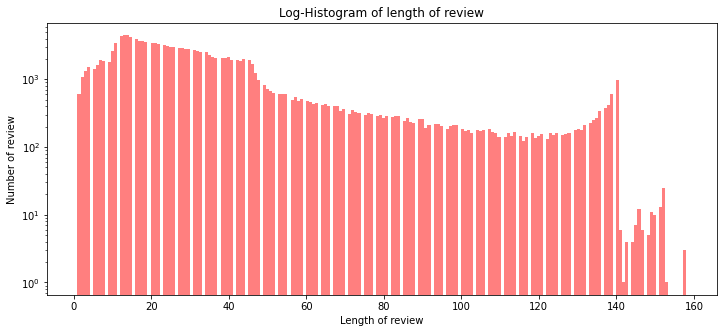

In [ ]:
# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(train_length, bins=200, alpha=0.5, color= 'r', label='word')
plt.yscale('log', nonposy='clip')
# 그래프 제목
plt.title('Log-Histogram of length of review')
# 그래프 x 축 라벨
plt.xlabel('Length of review')
# 그래프 y 축 라벨
plt.ylabel('Number of review')

    지속적으로 감소하던 리뷰의 길이가 140자 근처에서 급등함.
    리뷰 길이의 140자 제한이 있는 데이터인 것이 원인이라고 하지만 140자를 넘는 데이터도 존재함.
    이 경우는 특수문자 등으로 인한 것으로 분석됨





- 리뷰 길이에 대한 실제 통계값 확인

In [ ]:
print('리뷰 길이 최대 값: {}'.format(np.max(train_length)))
print('리뷰 길이 최소 값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간 값: {}'.format(np.median(train_length)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('리뷰 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))

리뷰 길이 최대 값: 158
리뷰 길이 최소 값: 1
리뷰 길이 평균 값: 35.24
리뷰 길이 표준편차: 29.58
리뷰 길이 중간 값: 27.0
리뷰 길이 제 1 사분위: 16.0
리뷰 길이 제 3 사분위: 42.0


- 박스플롯을 이용하여 리뷰 길이의 분포 확인

{'boxes': [<matplotlib.lines.Line2D at 0x7effe686d710>],
 'caps': [<matplotlib.lines.Line2D at 0x7effe6872750>,
 'fliers': [<matplotlib.lines.Line2D at 0x7effe6878cd0>],
 'means': [<matplotlib.lines.Line2D at 0x7effe6878790>],
 'medians': [<matplotlib.lines.Line2D at 0x7effe6878250>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7effe686dc90>,
  <matplotlib.lines.Line2D at 0x7effe6872210>]}

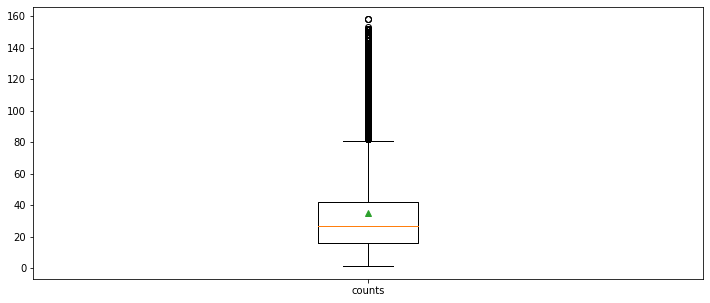

In [ ]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot(train_length,
             labels=['counts'],
             showmeans=True)

    일부 길이가 긴 데이터도 있으나 중간값과 평균값은 전체 데이터를 기준으로 아래쪽에 위치함

- 등장 어휘의 빈도 분석
  - 워드 클라우드 사용
  - 어휘 빈도 분석은 문자열에 대해서만 진행 가능
  - 데이터에서 문자열 외의 데이터는 모두 제거

In [ ]:
train_review = [review for review in train_data['document'] if type(review) is str]
wordclud = WordCloud(font_path = DATA_PATH + 'NanumGothic.ttf').generate(' '.join(train_review))

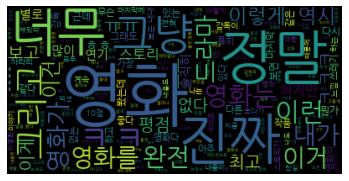

In [ ]:
plt.imshow(wordclud, interpolation='bilinear')
plt.axis('off')
plt.show()

- 긍정, 부정의 비율 확인

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


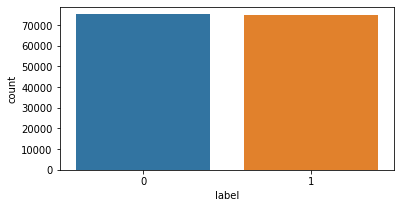

In [ ]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_data['label'])

In [ ]:
print("긍정 리뷰 개수: {}".format(train_data['label'].value_counts()[1]))
print("부정 리뷰 개수: {}".format(train_data['label'].value_counts()[0]))

긍정 리뷰 개수: 74827
부정 리뷰 개수: 75173


    거의 반반씩의 비율을 보여줌
    학습을 위한 데이터로서 편향성의 영향이 적도록 문장이 골고루 잘 분포되어 있음을 확인 가능

- 리뷰의 단어 수 확인
  - 각 데이터를 띄어쓰기 기준으로 나누어 그 개수를 변수로 할당
  - 히스토그램으로 표시

In [ ]:
train_word_counts = train_data['document'].astype(str).apply(lambda x:len(x.split(' ')))

Text(0, 0.5, 'Number of reviews')

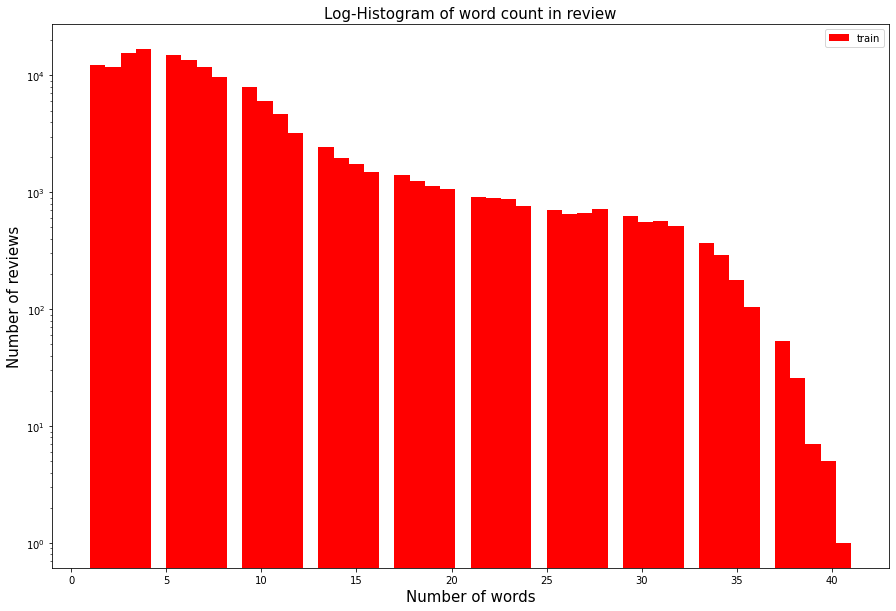

In [ ]:
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, facecolor='r',label='train')
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)

    단어의 수가 5개 정도인 문장이 많이 존재하며 그 이후로는 대체로 비슷한 분포를 보임
    30개 이상부터는 데이터 수가 급격히 줄어듬

In [ ]:
print('리뷰 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('리뷰 단어 개수 최소 값: {}'.format(np.min(train_word_counts)))
print('리뷰 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('리뷰 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('리뷰 단어 개수 중간 값: {}'.format(np.median(train_word_counts)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('리뷰 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))

리뷰 단어 개수 최대 값: 41
리뷰 단어 개수 최소 값: 1
리뷰 단어 개수 평균 값: 7.58
리뷰 단어 개수 표준편차: 6.51
리뷰 단어 개수 중간 값: 6.0
리뷰 단어 개수 제 1 사분위: 3.0
리뷰 단어 개수 제 3 사분위: 9.0


- 각 데이터에서 특수문자의 유무 확인하기

In [ ]:
qmarks = np.mean(train_data['document'].astype(str).apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
fullstop = np.mean(train_data['document'].astype(str).apply(lambda x: '.' in x)) # 마침표
                  
print('물음표가있는 질문: {:.2f}%'.format(qmarks * 100))
print('마침표가 있는 질문: {:.2f}%'.format(fullstop * 100))

물음표가있는 질문: 8.25%
마침표가 있는 질문: 51.76%


### 3.2 데이터 전처리

- 패키지 임포트

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 448 kB 64.4 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import re
import json
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

- 데이터 읽기

In [ ]:
train_data = pd.read_csv(DATA_PATH + 'ratings_train.txt', header=0, delimiter='\t', quoting=3 )
print(train_data.head())

         id                                           document  label
0   9976970                                아 더빙.. 진짜 짜증나네요 목소리      0
1   3819312                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1
2  10265843                                  너무재밓었다그래서보는것을추천한다      0
3   9045019                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0
4   6483659  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1


- 전처리 과정 함수 작성
  - 정규표현식을 이용한 데이터 정리: 한글, 공백이 아닌 문자는 모두 제거
  - 토크나이징(형태소 단위로 나누기)
  - 불용어 제거(선택적)


In [ ]:
# 기능별 확인: 한글, 공백 남기고 모두 제거
review_text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]", "", train_data['document'][0]) 
print(review_text)

아 더빙 진짜 짜증나네요 목소리


In [ ]:
# 기능별 확인: 토크나이징
okt=Okt()
review_text = okt.morphs(review_text, stem=True)
print(review_text)

['아', '더빙', '진짜', '짜증나다', '목소리']


In [ ]:
# 기능별 확인: 불용어 제거
stop_words = set(['은', '는', '이', '가', '하', '아', '것', '들','의', '있', '되', '수', '보', '주', '등', '한'])
clean_review = [token for token in review_text if not token in stop_words]
print(clean_review)

['더빙', '진짜', '짜증나다', '목소리']


In [ ]:
def preprocessing(review, okt, remove_stopwords = False, stop_words = []):
    # 함수의 인자는 다음과 같다.
    # review : 전처리할 텍스트
    # okt : okt 객체를 반복적으로 생성하지 않고 미리 생성후 인자로 받는다.
    # remove_stopword : 불용어를 제거할지 선택 기본값은 False
    # stop_word : 불용어 사전은 사용자가 직접 입력해야함 기본값은 비어있는 리스트
    
    # 1. 한글 및 공백을 제외한 문자 모두 제거.
    review_text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]", "", review)
    
    # 2. okt 객체를 활용해서 형태소 단위로 나눈다.
    word_review = okt.morphs(review_text, stem=True)
    
    if remove_stopwords:
        # 불용어 제거(선택적)
        word_review = [token for token in word_review if not token in stop_words]
   
    return word_review

- 전처리 함수를 이용하여 전처리 수행
  - 9분 소요

In [ ]:
stop_words = [ '은', '는', '이', '가', '하', '아', '것', '들','의', '있', '되', '수', '보', '주', '등', '한']
okt = Okt()
clean_train_review = []

for review in train_data['document']:
    # 비어있는 데이터에서 멈추지 않도록 string인 경우만 진행
    if type(review) == str:
        clean_train_review.append(preprocessing(review, okt, remove_stopwords = True, stop_words=stop_words))
    else:
        clean_train_review.append([])  #string이 아니면 비어있는 값 추가

In [ ]:
clean_train_review[:4]    # 앞의 4개의 데이터 확인

[['더빙', '진짜', '짜증나다', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'],
 ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다'],
 ['교도소', '이야기', '구먼', '솔직하다', '재미', '없다', '평점', '조정']]

- 테스트용 데이터도 동일하게 전처리 수행
  -3분 28초 소요

In [ ]:
test_data = pd.read_csv(DATA_PATH + 'ratings_test.txt', header=0, delimiter='\t', quoting=3 )

clean_test_review = []

for review in test_data['document']:
    # 비어있는 데이터에서 멈추지 않도록 string인 경우만 진행
    if type(review) == str:
        clean_test_review.append(preprocessing(review, okt, remove_stopwords = True, stop_words=stop_words))
    else:
        clean_test_review.append([])  #string이 아니면 비어있는 값 추가

- 학습용, 테스트용 데이터를 인덱스 벡터로 변환

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_review)
train_sequences = tokenizer.texts_to_sequences(clean_train_review)
test_sequences = tokenizer.texts_to_sequences(clean_test_review)

word_vocab = tokenizer.word_index # 단어 사전 형태
word_vocab["<PAD>"] = 0

- 패딩처리
  - 패딩 길이는 최대 8: 데이터 분석 과정에서 단어의 평균 개수가 약 8개였기 때문

In [ ]:
MAX_SEQUENCE_LENGTH = 8 # 문장 최대 길이

train_inputs = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post') # 학습 데이터를 벡터화
train_labels = np.array(train_data['label']) # 학습 데이터의 라벨

test_inputs = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post') # 테스트 데이터를 벡터화
test_labels = np.array(test_data['label']) # 테스트 데이터의 라벨

- 데이터 저장
  - 전처리 작업이 완료된 후, 해당 데이터를 모델링 과정에 사용할 수 있도록 파일로 저장함

In [ ]:
TRAIN_INPUT_DATA = 'nsmc_train_input.npy'
TRAIN_LABEL_DATA = 'nsmc_train_label.npy'
TEST_INPUT_DATA = 'nsmc_test_input.npy'
TEST_LABEL_DATA = 'nsmc_test_label.npy'
DATA_CONFIGS = 'data_configs.json'

data_configs = {}

data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab) # vocab size 추가

import os
# 저장하는 디렉토리가 존재하지 않으면 생성
if not os.path.exists(DATA_PATH):
    os.makedirs(DATA_PATH)

# 전처리 된 학습 데이터를 넘파이 형태로 저장
np.save(open(DATA_PATH + TRAIN_INPUT_DATA, 'wb'), train_inputs)
np.save(open(DATA_PATH + TRAIN_LABEL_DATA, 'wb'), train_labels)
# 전처리 된 테스트 데이터를 넘파이 형태로 저장
np.save(open(DATA_PATH + TEST_INPUT_DATA, 'wb'), test_inputs)
np.save(open(DATA_PATH + TEST_LABEL_DATA, 'wb'), test_labels)

# 데이터 사전을 json 형태로 저장
json.dump(data_configs, open(DATA_PATH + DATA_CONFIGS, 'w'), ensure_ascii=False)

### 3.3 모델링

- 패키지 임포트

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import os
import json

from tqdm import tqdm

- 전처리 데이터 불러오기

In [ ]:
INPUT_TRAIN_DATA = 'nsmc_train_input.npy'
LABEL_TRAIN_DATA = 'nsmc_train_label.npy'
DATA_CONFIGS = 'data_configs.json'

train_input = np.load(open(DATA_PATH + INPUT_TRAIN_DATA, 'rb'))
train_label = np.load(open(DATA_PATH + LABEL_TRAIN_DATA, 'rb'))
prepro_configs = json.load(open(DATA_PATH + DATA_CONFIGS, 'r'))

- 하이퍼 파라미터 정의

In [ ]:
model_name = 'cnn_classifier_kr'
BATCH_SIZE = 512
NUM_EPOCHS = 10
VALID_SPLIT = 0.1
MAX_LEN = train_input.shape[1]

kargs = {'model_name': model_name,
        'vocab_size': prepro_configs['vocab_size'],
        'embedding_size': 128,
        'num_filters': 100,
        'dropout_rate': 0.5,
        'hidden_dimension': 250,
        'output_dimension':1}

- CNNClassifier 모델 함수 구현
  - 빠른 학습을 위하여 모델은 깊게 구성하지 않음

In [ ]:
class CNNClassifier(tf.keras.Model):
    
    def __init__(self, **kargs):
        super(CNNClassifier, self).__init__(name=kargs['model_name'])
        self.embedding = layers.Embedding(input_dim=kargs['vocab_size'],
                                     output_dim=kargs['embedding_size'])
        self.conv_list = [layers.Conv1D(filters=kargs['num_filters'],
                                   kernel_size=kernel_size,
                                   padding='valid',
                                   activation=tf.keras.activations.relu,
                                   kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
                     for kernel_size in [3,4,5]]
        self.pooling = layers.GlobalMaxPooling1D()
        self.dropout = layers.Dropout(kargs['dropout_rate'])
        self.fc1 = layers.Dense(units=kargs['hidden_dimension'],
                           activation=tf.keras.activations.relu,
                           kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
        self.fc2 = layers.Dense(units=kargs['output_dimension'],
                           activation=tf.keras.activations.sigmoid,
                           kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
    
    def call(self, x):
        x = self.embedding(x)
        x = self.dropout(x)
        x = tf.concat([self.pooling(conv(x)) for conv in self.conv_list], axis=-1)
        x = self.fc1(x)
        x = self.fc2(x)
        
        return x

### 3.4 학습하기

- 모델 검증 지정하여 학습에 적용
  - 검증 정확도를 통한 EarlyStopping 기능 지정
  - 모델 저장 방식 지정
  - 검증 데이터 지정(model.fit 안의 validation_split)

In [ ]:
model = CNNClassifier(**kargs)

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')])

In [ ]:
# overfitting을 막기 위한 ealrystop 추가
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001,patience=2)
# min_delta: the threshold that triggers the termination (acc should at least improve 0.0001)
# patience: no improvment epochs (patience = 1, 1번 이상 상승이 없으면 종료)\

checkpoint_path = DATA_PATH + model_name + '/weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create path if exists
if os.path.exists(checkpoint_dir):
    print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
    os.makedirs(checkpoint_dir, exist_ok=True)
    print("{} -- Folder create complete \n".format(checkpoint_dir))

/gdrive/My Drive/Colab Notebooks/NLP_160H/data/nsmc/cnn_classifier_kr -- Folder create complete 



- 콜백 선언
  - 텐서플로의 콜백 함수는 모델을 저장할 때 사용됨
  - 콜백함수가 필요한 이유
    - 모델이 학습을 시작하면 학습이 완료될 때까지 사람이 할 수 있는게 없음
    - 이를 해결하고자 존재하는 것이 콜백함수임
    - 예를 들어, 학습 도중에 학습률을 변화시키거나 val_loss가 개선되지 않으면 학습을 멈추게 하는 등의 작업이 가능함

In [ ]:
cp_callback = ModelCheckpoint(
    checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True)

- 학습

In [ ]:
history = model.fit(train_input, train_label, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS,
                    validation_split=VALID_SPLIT, callbacks=[earlystop_callback, cp_callback])

Epoch 1/10
264/264 [==============================] - ETA: 0s - loss: 0.4606 - accuracy: 0.7745
Epoch 1: val_accuracy improved from -inf to 0.82227, saving model to /gdrive/My Drive/Colab Notebooks/NLP_160H/data/nsmc/cnn_classifier_kr/weights.h5
264/264 [==============================] - 17s 14ms/step - loss: 0.4606 - accuracy: 0.7745 - val_loss: 0.3897 - val_accuracy: 0.8223
Epoch 2/10
263/264 [============================>.] - ETA: 0s - loss: 0.3527 - accuracy: 0.8442
Epoch 2: val_accuracy improved from 0.82227 to 0.82507, saving model to /gdrive/My Drive/Colab Notebooks/NLP_160H/data/nsmc/cnn_classifier_kr/weights.h5
264/264 [==============================] - 3s 10ms/step - loss: 0.3527 - accuracy: 0.8442 - val_loss: 0.3875 - val_accuracy: 0.8251
Epoch 3/10
261/264 [============================>.] - ETA: 0s - loss: 0.2985 - accuracy: 0.8738
Epoch 3: val_accuracy improved from 0.82507 to 0.82547, saving model to /gdrive/My Drive/Colab Notebooks/NLP_160H/data/nsmc/cnn_classifier_kr/we

- 학습 및 검증 정확도, 손실값 확인
  - 시각화 함수 설정하여 활용

In [ ]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

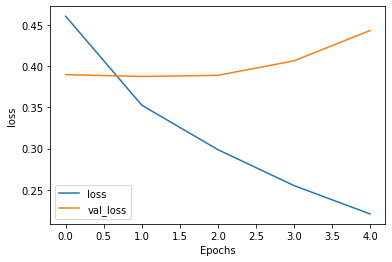

In [ ]:
plot_graphs(history, 'loss')

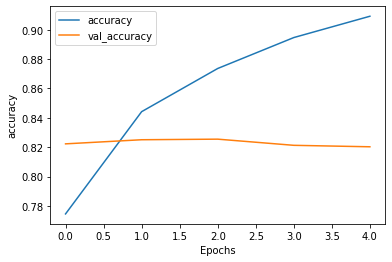

In [ ]:
plot_graphs(history, 'accuracy')

### 3.5 결과 평가하기

In [ ]:
INPUT_TEST_DATA = 'nsmc_test_input.npy'
LABEL_TEST_DATA = 'nsmc_test_label.npy'
SAVE_FILE_NM = 'weights.h5' #저장된 best model 이름

test_input = np.load(open(DATA_PATH + INPUT_TEST_DATA, 'rb'))
test_input = pad_sequences(test_input, maxlen=test_input.shape[1])
test_label_data = np.load(open(DATA_PATH + LABEL_TEST_DATA, 'rb'))

In [ ]:
model.load_weights(os.path.join(DATA_PATH, model_name, SAVE_FILE_NM))

In [ ]:
model.evaluate(test_input, test_label_data)

1563/1563 [==============================] - 5s 3ms/step - loss: 0.3900 - accuracy: 0.8269


[0.39000532031059265, 0.8268799781799316]

## **4. 챗봇 데이터 감정 분류하기(Tensorflow)**

### 4.1 패키지 임포트

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import preprocessing
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, Dropout, Conv1D, GlobalMaxPool1D, concatenate

### 4.2 데이터셋 생성

- 데이터 읽어오기

In [ ]:
train_file = ROOT_PATH + "/data/chatbot/chatbot_data.csv"
data = pd.read_csv(train_file, delimiter=',')
features = data['Q'].tolist()
labels = data['label'].tolist()

In [ ]:
data

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0
...,...,...,...
11818,훔쳐보는 것도 눈치 보임.,티가 나니까 눈치가 보이는 거죠!,2
11819,훔쳐보는 것도 눈치 보임.,훔쳐보는 거 티나나봐요.,2
11820,흑기사 해주는 짝남.,설렜겠어요.,2
11821,힘든 연애 좋은 연애라는게 무슨 차이일까?,잘 헤어질 수 있는 사이 여부인 거 같아요.,2


In [ ]:
features

['12시 땡!',
 '1지망 학교 떨어졌어',
 '3박4일 놀러가고 싶다',
 '3박4일 정도 놀러가고 싶다',
 'PPL 심하네',
 'SD카드 망가졌어',
 'SD카드 안돼',
 'SNS 맞팔 왜 안하지ㅠㅠ',
 'SNS 시간낭비인 거 아는데 매일 하는 중',
 'SNS 시간낭비인데 자꾸 보게됨',
 'SNS보면 나만 빼고 다 행복해보여',
 '가끔 궁금해',
 '가끔 뭐하는지 궁금해',
 '가끔은 혼자인게 좋다',
 '가난한 자의 설움',
 '가만 있어도 땀난다',
 '가상화폐 쫄딱 망함',
 '가스불 켜고 나갔어',
 '가스불 켜놓고 나온거 같아',
 '가스비 너무 많이 나왔다.',
 '가스비 비싼데 감기 걸리겠어',
 '가스비 장난 아님',
 '가장 확실한 건 뭘까?',
 '가족 여행 가기로 했어',
 '가족 여행 고고',
 '가족 여행 어디로 가지?',
 '가족 있어?',
 '가족관계 알려 줘',
 '가족끼리 여행간다.',
 '가족들 보고 싶어',
 '가족들이랑 서먹해',
 '가족들이랑 서먹해졌어',
 '가족들이랑 어디 가지?',
 '가족들이랑 여행 갈거야',
 '가족여행 가야지',
 '가족이 누구야?',
 '가족이랑 여행 가려고',
 '가족한테 스트레스 풀었어',
 '가출할까?',
 '가출해도 갈 데가 없어',
 '간만에 떨리니까 좋더라',
 '간만에 쇼핑 중',
 '간만에 휴식 중',
 '간식 뭐 먹을까',
 '간식 추천',
 '간장치킨 시켜야지',
 '간접흡연 싫어',
 '갈까 말까 고민 돼',
 '갈까 말까?',
 '감 말랭이 먹고 싶다.',
 '감 말랭이 먹어야지',
 '감기 같애',
 '감기 걸린 것 같아',
 '감기 기운이 있어',
 '감기 들 거 같애',
 '감기가 오려나',
 '감기약이 없어',
 '감기인거 같애',
 '감미로운 목소리 좋아',
 '감정이 쓰레기통처럼 엉망진창이야',
 '감정컨트롤을 못하겠어',
 '감정컨트롤이 안돼',
 '감히 나를 무시하는 애가 있어',
 '갑자기 나쁜 생각이 막 들더라',
 '갑자기 눈물 나',

- 데이터 벡터 변환

In [ ]:
corpus = [preprocessing.text.text_to_word_sequence(text) for text in features]
corpus

[['12시', '땡'],
 ['1지망', '학교', '떨어졌어'],
 ['3박4일', '놀러가고', '싶다'],
 ['3박4일', '정도', '놀러가고', '싶다'],
 ['ppl', '심하네'],
 ['sd카드', '망가졌어'],
 ['sd카드', '안돼'],
 ['sns', '맞팔', '왜', '안하지ㅠㅠ'],
 ['sns', '시간낭비인', '거', '아는데', '매일', '하는', '중'],
 ['sns', '시간낭비인데', '자꾸', '보게됨'],
 ['sns보면', '나만', '빼고', '다', '행복해보여'],
 ['가끔', '궁금해'],
 ['가끔', '뭐하는지', '궁금해'],
 ['가끔은', '혼자인게', '좋다'],
 ['가난한', '자의', '설움'],
 ['가만', '있어도', '땀난다'],
 ['가상화폐', '쫄딱', '망함'],
 ['가스불', '켜고', '나갔어'],
 ['가스불', '켜놓고', '나온거', '같아'],
 ['가스비', '너무', '많이', '나왔다'],
 ['가스비', '비싼데', '감기', '걸리겠어'],
 ['가스비', '장난', '아님'],
 ['가장', '확실한', '건', '뭘까'],
 ['가족', '여행', '가기로', '했어'],
 ['가족', '여행', '고고'],
 ['가족', '여행', '어디로', '가지'],
 ['가족', '있어'],
 ['가족관계', '알려', '줘'],
 ['가족끼리', '여행간다'],
 ['가족들', '보고', '싶어'],
 ['가족들이랑', '서먹해'],
 ['가족들이랑', '서먹해졌어'],
 ['가족들이랑', '어디', '가지'],
 ['가족들이랑', '여행', '갈거야'],
 ['가족여행', '가야지'],
 ['가족이', '누구야'],
 ['가족이랑', '여행', '가려고'],
 ['가족한테', '스트레스', '풀었어'],
 ['가출할까'],
 ['가출해도', '갈', '데가', '없어'],
 ['간만에', '떨리니까', '좋더라'],
 ['간만에', '쇼핑', '

In [ ]:
tokenizer = preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(corpus)

In [ ]:
sequences = tokenizer.texts_to_sequences(corpus)
sequences

[[4646, 4647],
 [4648, 343, 448],
 [2580, 803, 11],
 [2580, 804, 803, 11],
 [4649, 2581],
 [2582, 4650],
 [2582, 64],
 [805, 4651, 14, 4652],
 [805, 4653, 3, 502, 238, 45, 106],
 [805, 4654, 23, 4655],
 [4656, 52, 1128, 28, 1373],
 [693, 266],
 [693, 2583, 266],
 [2584, 4657, 324],
 [4658, 4659, 4660],
 [4661, 1129, 2585],
 [4662, 4663, 1374],
 [2586, 4664, 1375],
 [2586, 4665, 2587, 5],
 [1811, 1, 27, 4666],
 [1811, 2588, 1130, 4667],
 [1811, 628, 1131],
 [944, 1812, 154, 128],
 [1132, 176, 1376, 184],
 [1132, 176, 1133],
 [1132, 176, 945, 1813],
 [1132, 25],
 [2589, 4668, 503],
 [2590, 4669],
 [4670, 94, 4],
 [1377, 4671],
 [1377, 4672],
 [1377, 368, 1813],
 [1377, 176, 4673],
 [4674, 280],
 [2591, 1378],
 [4675, 176, 1379],
 [2592, 253, 4676],
 [4677],
 [4678, 504, 1380, 20],
 [1381, 4679, 1814],
 [1381, 1134, 106],
 [1381, 2593, 106],
 [1815, 41, 405],
 [1815, 254],
 [4680, 2594],
 [4681, 75],
 [325, 505, 308, 67],
 [325, 505],
 [2595, 2596, 53, 11],
 [2595, 2596, 185],
 [1130, 109

In [ ]:
word_index = tokenizer.word_index
word_index

{'너무': 1,
 '좋아하는': 2,
 '거': 3,
 '싶어': 4,
 '같아': 5,
 '안': 6,
 '나': 7,
 '좀': 8,
 '사람': 9,
 '내가': 10,
 '싶다': 11,
 '어떻게': 12,
 '썸': 13,
 '왜': 14,
 '내': 15,
 '사람이': 16,
 '이별': 17,
 '것': 18,
 '잘': 19,
 '없어': 20,
 '수': 21,
 '오늘': 22,
 '자꾸': 23,
 '이제': 24,
 '있어': 25,
 '또': 26,
 '많이': 27,
 '다': 28,
 '있을까': 29,
 '헤어진지': 30,
 '해': 31,
 '다시': 32,
 '될까': 33,
 '여자친구가': 34,
 '남자친구가': 35,
 '더': 36,
 '진짜': 37,
 '정말': 38,
 '게': 39,
 '나를': 40,
 '뭐': 41,
 '좋아': 42,
 '할까': 43,
 '하고': 44,
 '하는': 45,
 '연애': 46,
 '있는': 47,
 '계속': 48,
 '힘드네': 49,
 '연락': 50,
 '이': 51,
 '나만': 52,
 '먹고': 53,
 '이렇게': 54,
 '있는데': 55,
 '못': 56,
 '날': 57,
 '혼자': 58,
 '다른': 59,
 '방법': 60,
 '타는': 61,
 '한': 62,
 '그': 63,
 '안돼': 64,
 '그냥': 65,
 '없는': 66,
 '돼': 67,
 '짝남이': 68,
 '좋겠다': 69,
 '선물': 70,
 '모르겠어': 71,
 '같이': 72,
 '나한테': 73,
 '같은데': 74,
 '싫어': 75,
 '친구가': 76,
 '마음이': 77,
 '짝사랑': 78,
 '가고': 79,
 '사랑': 80,
 '헤어진': 81,
 '많아': 82,
 '힘들어': 83,
 '연락이': 84,
 '줄': 85,
 '좋겠어': 86,
 '술': 87,
 '후': 88,
 '짝남': 89,
 '듯': 90,
 '좋은': 91,
 '좋을까

In [ ]:
MAX_SEQ_LEN = 15  # 단어 시퀀스 벡터 크기
padded_seqs = preprocessing.sequence.pad_sequences(sequences, maxlen=MAX_SEQ_LEN, padding='post')

In [ ]:
padded_seqs

array([[ 4646,  4647,     0, ...,     0,     0,     0],
       [ 4648,   343,   448, ...,     0,     0,     0],
       [ 2580,   803,    11, ...,     0,     0,     0],
       ...,
       [13395,  2517,    89, ...,     0,     0,     0],
       [  147,    46,    91, ...,     0,     0,     0],
       [  555, 13398,     0, ...,     0,     0,     0]], dtype=int32)

- 학습셋:검증셋:테스트셋 = 7:2:1

In [ ]:
# 학습셋:검증셋:테스트셋 = 7:2:1
ds = tf.data.Dataset.from_tensor_slices((padded_seqs, labels))
ds = ds.shuffle(len(features))
train_size = int(len(padded_seqs) * 0.7)
val_size = int(len(padded_seqs) * 0.2)
test_size = int(len(padded_seqs) * 0.1)
train_ds = ds.take(train_size).batch(20)
val_ds = ds.skip(train_size).take(val_size).batch(20)
test_ds = ds.skip(train_size + val_size).take(test_size).batch(20)

### 4.3 모델 구현

- 설정

In [ ]:
# 하이퍼파라미터 설정
dropout_prob = 0.5
EMB_SIZE = 128
EPOCH = 5
VOCAB_SIZE = len(word_index) + 1  # 전체 단어 수

- CNN 모델 정의

In [ ]:
# CNN 모델 정의
input_layer = Input(shape=(MAX_SEQ_LEN,))
embedding_layer = Embedding(VOCAB_SIZE, EMB_SIZE, input_length=MAX_SEQ_LEN)(input_layer)
dropout_emb = Dropout(rate=dropout_prob)(embedding_layer)

conv1 = Conv1D(filters=128, kernel_size=3, padding='valid', activation=tf.nn.relu)(dropout_emb)
pool1 = GlobalMaxPool1D()(conv1)
conv2 = Conv1D(filters=128, kernel_size=4, padding='valid', activation=tf.nn.relu)(dropout_emb)
pool2 = GlobalMaxPool1D()(conv2)
conv3 = Conv1D(filters=128, kernel_size=5, padding='valid', activation=tf.nn.relu)(dropout_emb)
pool3 = GlobalMaxPool1D()(conv3)

- 결과 데이터 설정
  - 3, 4, 5- gram 이후 합치기

In [ ]:
concat = concatenate([pool1, pool2, pool3])
hidden = Dense(128, activation=tf.nn.relu)(concat)
dropout_hidden = Dropout(rate=dropout_prob)(hidden)
logits = Dense(3, name='logits')(dropout_hidden)
predictions = Dense(3, activation=tf.nn.softmax)(logits)

- 모델 객체 생성

In [ ]:
model = Model(inputs=input_layer, outputs=predictions)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

- 모델 학습

In [ ]:
model.fit(train_ds, validation_data=val_ds, epochs=EPOCH, verbose=1)

Epoch 1/5
414/414 [==============================] - 6s 12ms/step - loss: 0.8819 - accuracy: 0.5642 - val_loss: 0.5029 - val_accuracy: 0.8215
Epoch 2/5
414/414 [==============================] - 3s 6ms/step - loss: 0.5096 - accuracy: 0.8115 - val_loss: 0.2500 - val_accuracy: 0.9179
Epoch 3/5
414/414 [==============================] - 3s 6ms/step - loss: 0.3236 - accuracy: 0.8922 - val_loss: 0.1627 - val_accuracy: 0.9505
Epoch 4/5
414/414 [==============================] - 3s 6ms/step - loss: 0.2003 - accuracy: 0.9374 - val_loss: 0.0996 - val_accuracy: 0.9717
Epoch 5/5
414/414 [==============================] - 3s 6ms/step - loss: 0.1242 - accuracy: 0.9600 - val_loss: 0.0667 - val_accuracy: 0.9793


- 모델 평가

In [ ]:
loss, accuracy = model.evaluate(test_ds, verbose=1)
print('Accuracy: %f' % (accuracy * 100))
print('loss: %f' % (loss))

60/60 [==============================] - 0s 3ms/step - loss: 0.0786 - accuracy: 0.9780
Accuracy: 97.800338
loss: 0.078647


- 모델 저장

In [ ]:
model.save('cnn_model.h5')

### 4.4 챗봇 문답 데이터 감정 분류 모델 사용하기

In [ ]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import preprocessing

In [ ]:
# 데이터 읽어오기
train_file = ROOT_PATH + "/data/chatbot/chatbot_data.csv"
data = pd.read_csv(train_file, delimiter=',')
features = data['Q'].tolist()
labels = data['label'].tolist()

In [ ]:
# 단어 인덱스 시퀀스 벡터
corpus = [preprocessing.text.text_to_word_sequence(text) for text in features]
tokenizer = preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
MAX_SEQ_LEN = 15 # 단어 시퀀스 벡터 크기
padded_seqs = preprocessing.sequence.pad_sequences(sequences, maxlen=MAX_SEQ_LEN, padding='post')

In [ ]:
# 테스트용 데이터셋 생성
ds = tf.data.Dataset.from_tensor_slices((padded_seqs, labels))
ds = ds.shuffle(len(features))
test_ds = ds.take(2000).batch(20) # 테스트 데이터셋

In [ ]:
# 감정 분류 CNN 모델 불러오기
model = load_model('cnn_model.h5')
model.summary()
model.evaluate(test_ds, verbose=2)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 15)]         0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 15, 128)      1715072     ['input_1[0][0]']                
                                                                                                  
 dropout_1 (Dropout)            (None, 15, 128)      0           ['embedding_1[0][0]']            
                                                                                                  
 conv1d_3 (Conv1D)              (None, 13, 128)      49280       ['dropout_1[0][0]']              
                                                                                              

[0.0762731060385704, 0.9775000214576721]

In [ ]:
# 테스트용 데이터셋의 10212번째 데이터 출력
print("단어 시퀀스 : ", corpus[10212])
print("단어 인덱스 시퀀스 : ", padded_seqs[10212])
print("문장 분류(정답) : ", labels[10212])

단어 시퀀스 :  ['썸', '타는', '여자가', '남사친', '만나러', '간다는데', '뭐라', '해']
단어 인덱스 시퀀스 :  [   13    61   127  4320  1333 12162   856    31     0     0     0     0
     0     0     0]
문장 분류(정답) :  2


In [ ]:
# 테스트용 데이터셋의 10212번째 데이터 감정 예측
picks = [10212]
predict = model.predict(padded_seqs[picks])
predict_class = tf.math.argmax(predict, axis=1)
print("감정 예측 점수 : ", predict)
print("감정 예측 클래스 : ", predict_class.numpy())

감정 예측 점수 :  [[3.6717577e-06 1.0450276e-06 9.9999523e-01]]
감정 예측 클래스 :  [2]
